In [5]:
import os
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
DATASET_BRICK_CRACKS_PATH = "../dataset/brick_cracks"
DATASET_CONCRETE_CRACKS_PATH = "../dataset/concrete_cracks"
DATASET_NODEFECTS_PATH = "../dataset/nodefects"

# Считывание данных

In [7]:
def read_dataset(dataset_path: str, defect_type: str) -> pd.DataFrame:
    data = []
    
    images_dir = os.path.join(dataset_path, "images")
    masks_dir = os.path.join(dataset_path, "masks")
    for image_name in os.listdir(images_dir):
        images_path = os.path.join(images_dir, image_name)
        
        image_name_no_ext = os.path.splitext(image_name)[0]
        mask_name = [f for f in os.listdir(masks_dir) if os.path.splitext(f)[0] == image_name_no_ext][0]
        
        image = cv2.imread(images_path)
        height, width = image.shape[:2]
        
        data.append({
            "image_name": image_name,
            "mask_name": mask_name,
            "defect_type": defect_type,
            "height": height,
            "width": width
        })

    return pd.DataFrame(data)

In [8]:
brick_cracks_df = read_dataset(DATASET_BRICK_CRACKS_PATH, "brick_cracks")
concrete_cracks_df = read_dataset(DATASET_CONCRETE_CRACKS_PATH, "nodefects")
nodefects_df = read_dataset(DATASET_NODEFECTS_PATH, "concrete_cracks")

In [9]:
brick_cracks_df

,image_name,mask_name,defect_type,height,width
0,a_0_10.png,a_0_10.png,brick_cracks,224,224
1,a_0_11.png,a_0_11.png,brick_cracks,224,224
2,a_0_15.png,a_0_15.png,brick_cracks,224,224
3,a_0_16.png,a_0_16.png,brick_cracks,224,224
4,a_0_21.png,a_0_21.png,brick_cracks,224,224
...,...,...,...,...,...
398,h_40_93.png,h_40_93.png,brick_cracks,224,224
399,h_41_112.png,h_41_112.png,brick_cracks,224,224
400,h_41_244.png,h_41_244.png,brick_cracks,224,224
401,h_41_259.png,h_41_259.png,brick_cracks,224,224


In [10]:
concrete_cracks_df

,image_name,mask_name,defect_type,height,width
0,0.png,0.png,nodefects,512,512
1,1.png,1.png,nodefects,512,512
2,10.png,10.png,nodefects,512,512
3,100.png,100.png,nodefects,512,512
4,101.png,101.png,nodefects,512,512
...,...,...,...,...,...
742,IMG_6542-5.jpg,IMG_6542-5.jpg,nodefects,544,384
743,IMG_6542-7.jpg,IMG_6542-7.jpg,nodefects,544,384
744,IMG_6544-1.jpg,IMG_6544-1.jpg,nodefects,544,384
745,IMG_6544-2.jpg,IMG_6544-2.jpg,nodefects,544,384


In [11]:
nodefects_df

,image_name,mask_name,defect_type,height,width
0,nodefect1.jpg,nodefect1.jpg,concrete_cracks,448,448
1,nodefect10.jpg,nodefect10.jpg,concrete_cracks,448,448
2,nodefect100.jpg,nodefect100.jpg,concrete_cracks,448,448
3,nodefect1000.jpg,nodefect1000.jpg,concrete_cracks,448,448
4,nodefect1001.jpg,nodefect1001.jpg,concrete_cracks,448,448
...,...,...,...,...,...
1168,nodefect995.jpg,nodefect995.jpg,concrete_cracks,448,448
1169,nodefect996.jpg,nodefect996.jpg,concrete_cracks,448,448
1170,nodefect997.jpg,nodefect997.jpg,concrete_cracks,448,448
1171,nodefect998.jpg,nodefect998.jpg,concrete_cracks,448,448


# Примеры данных

In [12]:
def show_examples(df: pd.DataFrame, images_dir: str, masks_dir: str, num_examples: int = 9) -> None:
    grid_size = int(np.sqrt(num_examples))
    # fig, axes = plt.subplots(grid_size * 2, grid_size, figsize=(8, 8))
    fig, axes = plt.subplots(grid_size, grid_size * 2, figsize=(12, 8))
    
    random_samples = df.sample(n=num_examples)
    for i, (index, row) in enumerate(random_samples.iterrows()):
        image_path = os.path.join(images_dir, row["image_name"])
        mask_path = os.path.join(masks_dir, row["mask_name"])
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        # print(f"image: row={(i // grid_size) * 2} col={i % grid_size}")
        # print(f"mask: row={(i // grid_size) * 2 + 1} col={i % grid_size}")
        # axes[(i // grid_size) * 2, i % grid_size].imshow(image)
        # axes[(i // grid_size) * 2, i % grid_size].axis('off')
        
        # axes[(i // grid_size) * 2 + 1, i % grid_size].imshow(mask, cmap='gray')
        # axes[(i // grid_size) * 2 + 1, i % grid_size].axis('off')
        
        defect_row = i // grid_size
        defect_col = 2 * (i % grid_size)
        mask_row = defect_row
        mask_col = defect_col + 1
        
        # print(f"image: row={defect_row}, col={defect_col}")
        # print(f"mask: row={mask_row}, col={mask_col}")
        
        axes[defect_row, defect_col].imshow(image)
        axes[defect_row, defect_col].axis('off')
        
        axes[mask_row, mask_col].imshow(mask, cmap='gray')
        axes[mask_row, mask_col].axis('off')
        
    plt.tight_layout()
    plt.show()
        

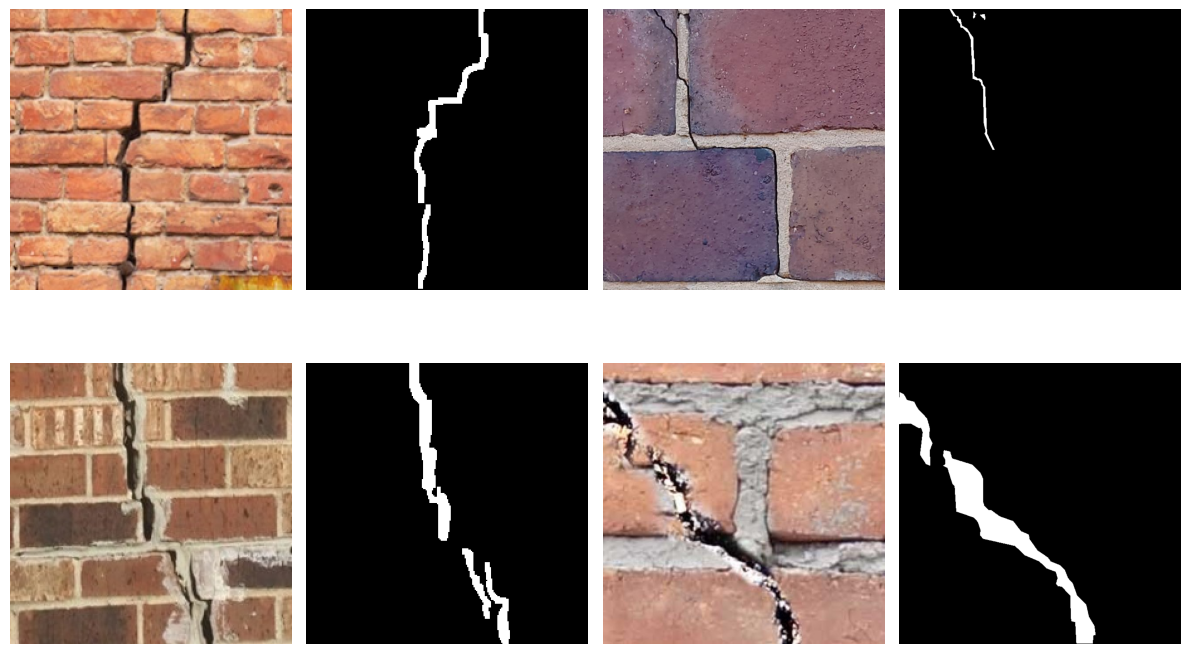

In [33]:
show_examples(df=brick_cracks_df,
              images_dir=os.path.join(DATASET_BRICK_CRACKS_PATH, "images"),
              masks_dir=os.path.join(DATASET_BRICK_CRACKS_PATH, "masks"),
              num_examples=4)

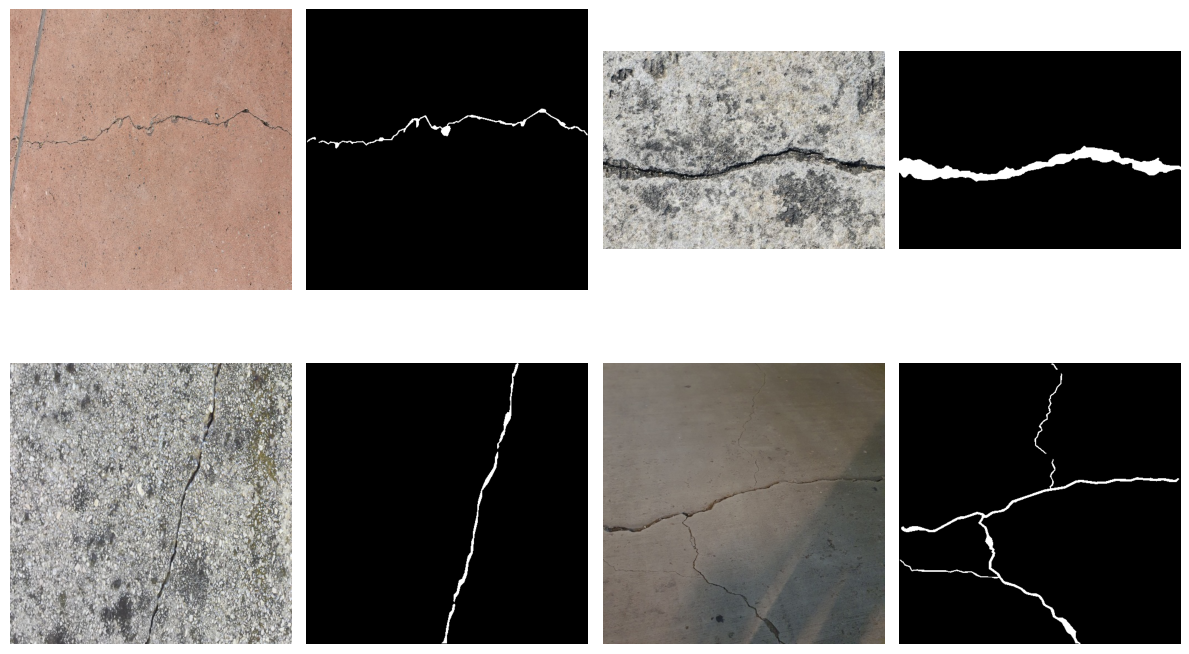

In [34]:
show_examples(df=concrete_cracks_df,
              images_dir=os.path.join(DATASET_CONCRETE_CRACKS_PATH, "images"),
              masks_dir=os.path.join(DATASET_CONCRETE_CRACKS_PATH, "masks"),
              num_examples=4)

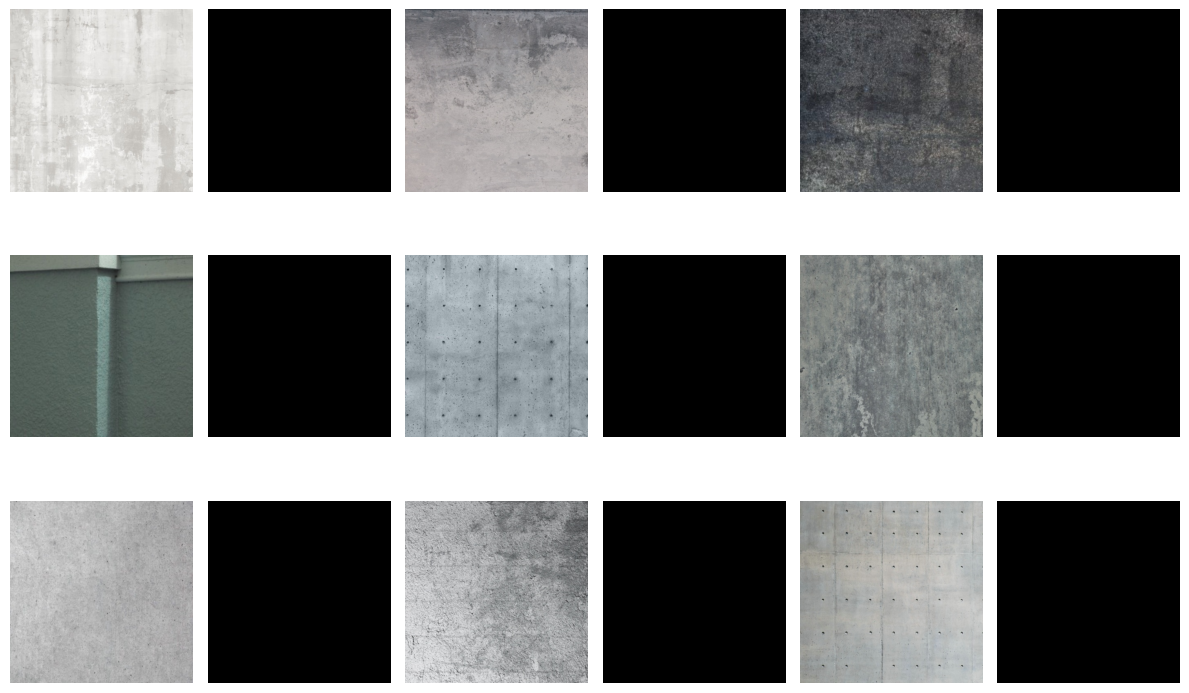

In [15]:
show_examples(df=nodefects_df,
              images_dir=os.path.join(DATASET_NODEFECTS_PATH, "images"),
              masks_dir=os.path.join(DATASET_NODEFECTS_PATH, "masks"),
              num_examples=9)

# Статистика по изображениям

$$ PDP^{(i)} = \frac{P_{\text{defect}}^{(i)}}{P_{\text{total}}^{(i)}} $$

Здесь:

$ PDP^{(i)}$ - Proportion of defective pixels - доля пикселей для i-го изображения, которые относятся к дефекту.

$ P_{\text{defect}}^{(i)} $ - количество пикселей, которые относятся к дефекту (соответсвуют белым пикселям со значением 255 в маске)

$ P_{\text{total}}^{(i)} $ - общее количество пикселей в изображении. Расчитывается как произведение ширины изображения на его высоту.

$ PDP_{\text{macro}} = \frac{1}{N} \sum_{i=1}^{N} PDP^{(i)} $, где N - количество изображений в выбранной категории.

In [16]:
print(f"Количество трещин (кирпич): {brick_cracks_df.shape[0]}")
print(f"Количество трещин (бетон): {concrete_cracks_df.shape[0]}")
print(f"Количество изображений без дефектов: {nodefects_df.shape[0]}")

Количество трещин (кирпич): 403
Количество трещин (бетон): 747
Количество изображений без дефектов: 1173


In [17]:
print("Статистика по высоте (трещины):")
print(brick_cracks_df["height"].value_counts())

print(f"Статистика по ширине (трещины):")
print(brick_cracks_df["width"].value_counts())

print(brick_cracks_df)

Статистика по высоте (трещины):
height
640    273
224    130
Name: count, dtype: int64
Статистика по ширине (трещины):
width
640    273
224    130
Name: count, dtype: int64
       image_name     mask_name   defect_type  height  width
0      a_0_10.png    a_0_10.png  brick_cracks     224    224
1      a_0_11.png    a_0_11.png  brick_cracks     224    224
2      a_0_15.png    a_0_15.png  brick_cracks     224    224
3      a_0_16.png    a_0_16.png  brick_cracks     224    224
4      a_0_21.png    a_0_21.png  brick_cracks     224    224
..            ...           ...           ...     ...    ...
398   h_40_93.png   h_40_93.png  brick_cracks     224    224
399  h_41_112.png  h_41_112.png  brick_cracks     224    224
400  h_41_244.png  h_41_244.png  brick_cracks     224    224
401  h_41_259.png  h_41_259.png  brick_cracks     224    224
402   h_41_68.png   h_41_68.png  brick_cracks     224    224

[403 rows x 5 columns]


In [18]:
print("Статистика по высоте (сколы):")
print(concrete_cracks_df["height"].value_counts())

print(f"Статистика по ширине (сколы):")
print(concrete_cracks_df["width"].value_counts())

print(concrete_cracks_df)

Статистика по высоте (сколы):
height
384    372
512    356
544     19
Name: count, dtype: int64
Статистика по ширине (сколы):
width
544    372
512    356
384     19
Name: count, dtype: int64
         image_name       mask_name defect_type  height  width
0             0.png           0.png   nodefects     512    512
1             1.png           1.png   nodefects     512    512
2            10.png          10.png   nodefects     512    512
3           100.png         100.png   nodefects     512    512
4           101.png         101.png   nodefects     512    512
..              ...             ...         ...     ...    ...
742  IMG_6542-5.jpg  IMG_6542-5.jpg   nodefects     544    384
743  IMG_6542-7.jpg  IMG_6542-7.jpg   nodefects     544    384
744  IMG_6544-1.jpg  IMG_6544-1.jpg   nodefects     544    384
745  IMG_6544-2.jpg  IMG_6544-2.jpg   nodefects     544    384
746  IMG_6544-3.jpg  IMG_6544-3.jpg   nodefects     544    384

[747 rows x 5 columns]


In [19]:
print("Статистика по высоте (без дефектов):")
print(nodefects_df["height"].value_counts())

print(f"Статистика по ширине (без дефектов):")
print(nodefects_df["width"].value_counts())

print(nodefects_df)

Статистика по высоте (без дефектов):
height
448    1173
Name: count, dtype: int64
Статистика по ширине (без дефектов):
width
448    1173
Name: count, dtype: int64
            image_name         mask_name      defect_type  height  width
0        nodefect1.jpg     nodefect1.jpg  concrete_cracks     448    448
1       nodefect10.jpg    nodefect10.jpg  concrete_cracks     448    448
2      nodefect100.jpg   nodefect100.jpg  concrete_cracks     448    448
3     nodefect1000.jpg  nodefect1000.jpg  concrete_cracks     448    448
4     nodefect1001.jpg  nodefect1001.jpg  concrete_cracks     448    448
...                ...               ...              ...     ...    ...
1168   nodefect995.jpg   nodefect995.jpg  concrete_cracks     448    448
1169   nodefect996.jpg   nodefect996.jpg  concrete_cracks     448    448
1170   nodefect997.jpg   nodefect997.jpg  concrete_cracks     448    448
1171   nodefect998.jpg   nodefect998.jpg  concrete_cracks     448    448
1172   nodefect999.jpg   nodefect9

In [20]:
def calculate_pdp(mask_path: str) -> float:
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    total_pixels = mask.shape[0] * mask.shape[1]
    defect_pixels = np.sum(mask != 0)
    return (defect_pixels / total_pixels) * 100

def add_pdp_to_df(df: pd.DataFrame, mask_dir: str):
    pdp_list = []
    for _, row in df.iterrows():
        mask_path = os.path.join(mask_dir, row["mask_name"])
        pdp = calculate_pdp(mask_path)
        pdp_list.append(pdp)
        
    df["pdp"] = pdp_list
    return df

In [21]:
concrete_cracks_df = add_pdp_to_df(concrete_cracks_df, mask_dir=os.path.join(DATASET_CONCRETE_CRACKS_PATH, "masks"))

In [22]:
pdp_mean = concrete_cracks_df["pdp"].mean()
pdp_544x384_mean = concrete_cracks_df.loc[(concrete_cracks_df["height"] == 384) & (concrete_cracks_df["width"] == 544)]["pdp"].mean()
pdp_384x544_mean = concrete_cracks_df.loc[(concrete_cracks_df["height"] == 544) & (concrete_cracks_df["width"] == 384)]["pdp"].mean()
pdp_512x512_mean = concrete_cracks_df.loc[(concrete_cracks_df["height"] == 512) & (concrete_cracks_df["width"] == 512)]["pdp"].mean()

print(f"Общая доля дефектных пикселей для трещин (бетон): {pdp_mean}")
print(f"\t Доля дефектных пикселей для трещин 544x384: {pdp_544x384_mean}")
print(f"\t Доля дефектных пикселей для трещин 512x512: {pdp_512x512_mean}")
print(f"\t Доля дефектных пикселей для трещин 384x544: {pdp_384x544_mean}")

Общая доля дефектных пикселей для трещин (бетон): 2.7659247502738182
	 Доля дефектных пикселей для трещин 544x384: 3.094167144344297
	 Доля дефектных пикселей для трещин 512x512: 2.3773857716763955
	 Доля дефектных пикселей для трещин 384x544: 3.619277686403509


In [23]:
brick_cracks_df = add_pdp_to_df(brick_cracks_df, mask_dir=os.path.join(DATASET_BRICK_CRACKS_PATH, "masks"))

In [24]:
pdp_mean = brick_cracks_df["pdp"].mean()
pdp_640x640_mean = brick_cracks_df.loc[(brick_cracks_df["height"] == 640) & (brick_cracks_df["width"] == 640)]["pdp"].mean()
pdp_224x224_mean = brick_cracks_df.loc[(brick_cracks_df["height"] == 224) & (brick_cracks_df["width"] == 224)]["pdp"].mean()

print(f"Общая доля дефектных пикселей для трещин (кирпич): {pdp_mean}")
print(f"\t Доля дефектных пикселей для трещин 640x640: {pdp_640x640_mean}")
print(f"\t Доля дефектных пикселей для трещин 224x224: {pdp_224x224_mean}")

Общая доля дефектных пикселей для трещин (кирпич): 3.528768103521263
	 Доля дефектных пикселей для трещин 640x640: 2.8088575649610807
	 Доля дефектных пикселей для трещин 224x224: 5.040580234497644


In [25]:
nodefects_df = add_pdp_to_df(nodefects_df, mask_dir=os.path.join(DATASET_NODEFECTS_PATH, "masks"))

In [26]:
brick_cracks_pdp = brick_cracks_df["pdp"].tolist()
concrete_cracks_pdp = concrete_cracks_df["pdp"].tolist()
print(f"Mean: {np.mean(brick_cracks_pdp + concrete_cracks_pdp)}")

Mean: 3.0332515949335743


In [27]:
pdp_mean = nodefects_df["pdp"].mean()

print(f"Общая доля дефектных пикселей без дефектов: {pdp_mean}")

Общая доля дефектных пикселей без дефектов: 0.0


In [ ]:
def plot_pdp_distribution(df: pd.DataFrame, class_name: str)->None:
    plt.figure(figsize=(12, 5))
    
    bins = np.arange(0, 105, 5)
    n, bins, patches = plt.hist(df["pdp"], bins=bins, color="skyblue", edgecolor="black", align="mid")
    
    for i in range(len(patches)):
        if n[i] > 0: 
            plt.text(
                x=(bins[i] + bins[i+1]) / 2,
                y=n[i] + 0.5,
                s=f"{int(n[i])}", 
                ha="center", 
                va="bottom",
                fontsize=12,
                color="black"
            )
            
    plt.xticks(bins, rotation=45) 
    plt.xlim(-2, 102) 
    
    plt.title(
        f"Распределение доли дефектных пикселей ({class_name})", 
        fontsize=14, pad=15
    )
    plt.xlabel("Доля дефектных пикселей (%)", fontsize=14)
    plt.ylabel("Количество изображений", fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)
    plt.ylim(0, n.max() * 1.1)
    plt.show()

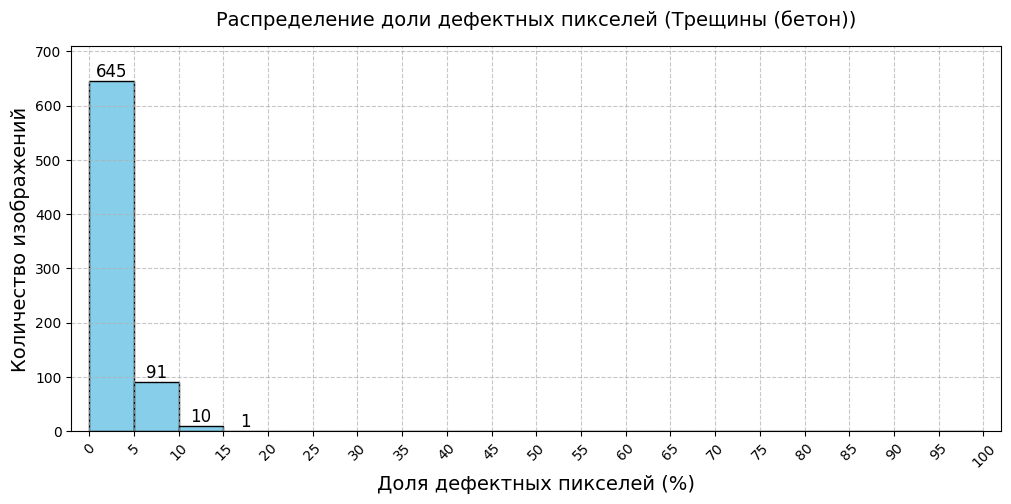

In [29]:
plot_pdp_distribution(concrete_cracks_df, class_name="Трещины (бетон)")

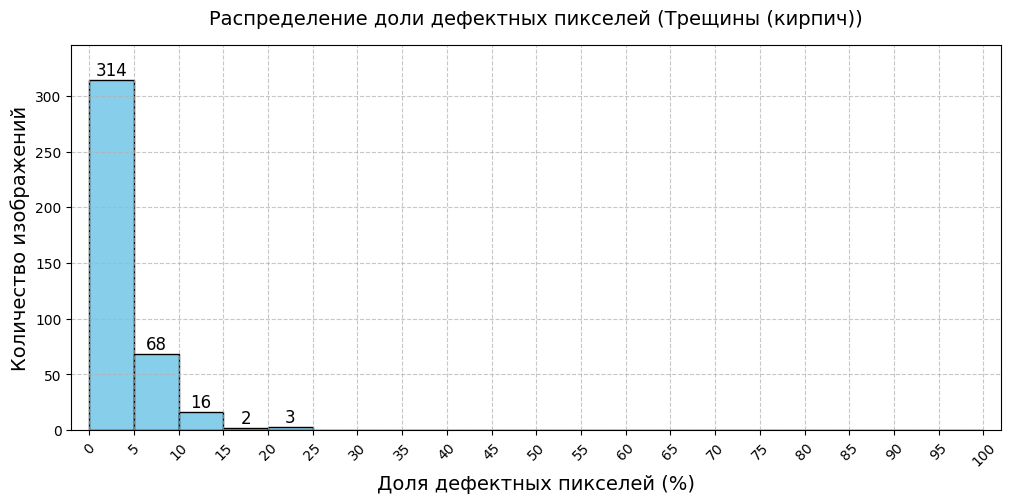

In [30]:
plot_pdp_distribution(brick_cracks_df, class_name="Трещины (кирпич)")

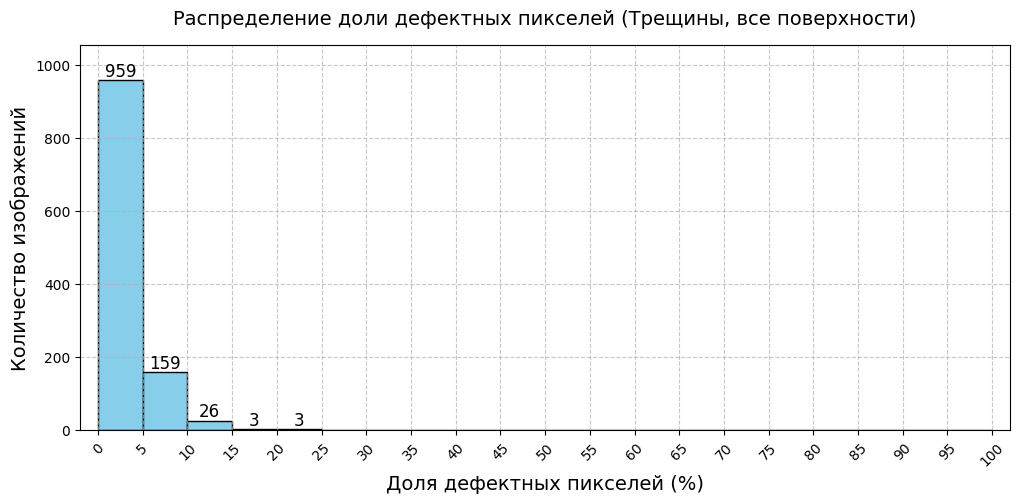

In [31]:
combined_df = pd.concat([brick_cracks_df, concrete_cracks_df], ignore_index=True)
plot_pdp_distribution(combined_df, class_name="Трещины, все поверхности")